## Impact of temperature on Rice Production: Analysis of Top Producing Countries
This analysis encapsulates an in-depth exploration into how temerature factor and farming techniques influence rice yields over time, specifically in major rice-producing regions. The analysis underscores the importance of historical trends, offering a longitudinal view of fluctuations and patterns that have shaped rice production. Focusing on the top-producing countries ensures the study's relevance to the rice production.

In [8]:
import pandas as pd
import numpy as np
import altair as alt
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from IPython.display import display, Markdown

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
# Reading in the data
def load_and_preview_data(filepath):
    """Load the dataset and display the first few rows."""
    data = pd.read_csv(filepath)
    preview = data.head()
    return data, preview

# Load and preview the dataset
data, data_preview = load_and_preview_data("temporal_merged_data.csv")
data_preview

,Year,Country,Average_Temperature,Average_Rainfall,Item,Yield,Pesticides
0,1990,Ghana,26.73,1187.0,Cassava,84170,65.8
1,1990,Ghana,26.73,1187.0,Maize,11889,65.8
2,1990,Ghana,26.73,1187.0,Plantains and others,61890,65.8
3,1990,Ghana,26.73,1187.0,"Rice, paddy",16510,65.8
4,1990,Ghana,26.73,1187.0,Sorghum,6310,65.8


In [10]:
def data_summary(df):
    """Provide a summary of the dataset's main characteristics."""
    # Describe the dataset to get summary statistics for numerical columns
    numerical_summary = df.describe()
    
    # Get the unique values for categorical columns
    country_unique_values = df['Country'].unique()
    item_unique_values = df['Item'].unique()
    
    return numerical_summary, country_unique_values, item_unique_values

# Get the data summary
numerical_summary, country_unique_values, item_unique_values = data_summary(data)
numerical_summary

,Year,Average_Temperature,Average_Rainfall,Yield,Pesticides
count,28248.000000,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,20.543722,1149.050816,77047.863282,37069.136973
std,7.052997,6.311828,709.736848,84950.194454,59954.787836
min,1990.000000,1.300000,51.000000,50.000000,0.040000
25%,1995.000000,16.710000,593.000000,19918.750000,1695.710000
50%,2001.000000,21.510000,1083.000000,38295.000000,17517.760000
75%,2008.000000,26.000000,1668.000000,104598.250000,48687.880000
max,2013.000000,30.650000,3240.000000,501412.000000,367778.000000


In [11]:
# Normalize the data
def normalize_data(data):
    # Remove rows with Year before 1990
    data = data[data['Year'] >= 1990]
    
    # List of columns to normalize
    columns_to_normalize = ["Pesticides", "Average_Rainfall", "Average_Temperature"]
    
    # Normalize the specified columns
    for col in columns_to_normalize:
        data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    
    return data

# Apply the function to the dataset
data = normalize_data(data)

# Display the first few rows of the normalized dataset
data.head(), data.tail()


(   Year Country  Average_Temperature  Average_Rainfall                  Item  \
 0  1990   Ghana              0.86644          0.356225               Cassava   
 1  1990   Ghana              0.86644          0.356225                 Maize   
 2  1990   Ghana              0.86644          0.356225  Plantains and others   
 3  1990   Ghana              0.86644          0.356225           Rice, paddy   
 4  1990   Ghana              0.86644          0.356225               Sorghum   
 
    Yield  Pesticides  
 0  84170    0.000179  
 1  11889    0.000179  
 2  61890    0.000179  
 3  16510    0.000179  
 4   6310    0.000179  ,
        Year  Country  Average_Temperature  Average_Rainfall      Item   Yield  \
 28243  2013  Croatia             0.350256           0.33302     Maize   65000   
 28244  2013  Croatia             0.350256           0.33302  Potatoes  158785   
 28245  2013  Croatia             0.350256           0.33302   Sorghum   50203   
 28246  2013  Croatia             0.350

In [12]:
def filter_for_rice(data):
    """Filter the dataset for rice production."""
    return data[data['Item'] == 'Rice, paddy']

def top_rice_producing_countries(data, top_n=5):
    """Identify the top rice-producing countries based on average yield."""
    avg_yield = data.groupby('Country')['Yield'].mean().sort_values(ascending=False)
    return avg_yield.head(top_n).index.tolist()

# Filter the dataset for rice
rice_data = filter_for_rice(data)

# Identify the top 5 rice-producing countries
top_countries = top_rice_producing_countries(rice_data)

top_countries

['Egypt', 'Australia', 'Greece', 'Spain', 'Uruguay']

The top 5 rice-producing countries in the dataset, based on average yield over the years, are:
- Egypt
- ustralia
- Greece
- Spain
- Uruguay

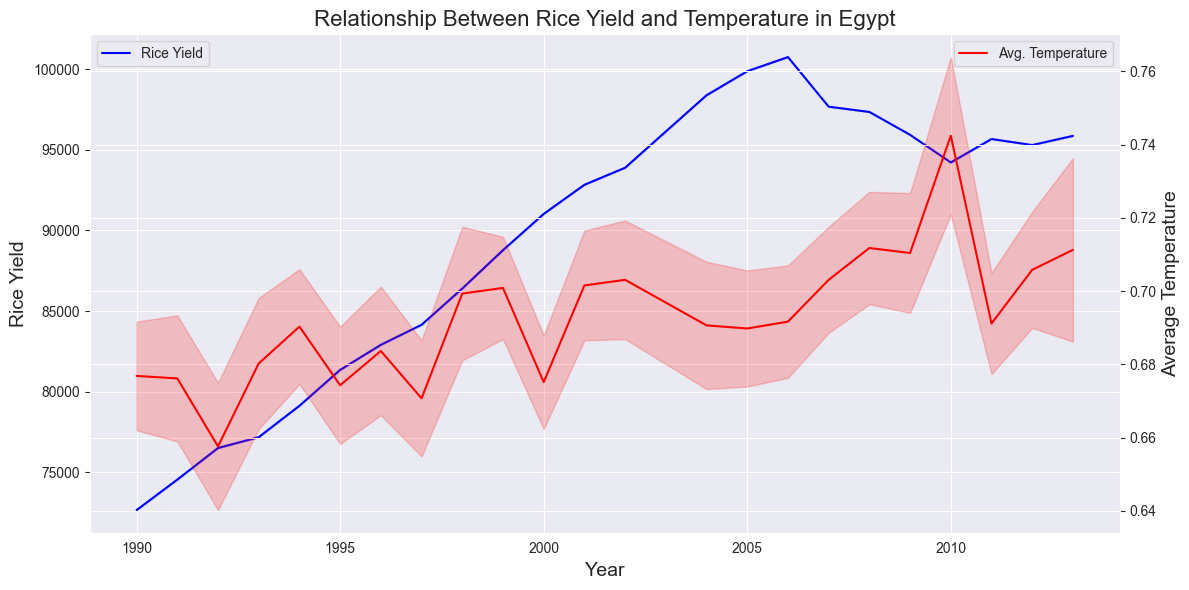

In [26]:
def plot_yield_temperature(data, country):
    """Dual-axis plot for the relationship between rice yield and temperature."""
    
    # Filter data for the specified country
    country_data = data[data['Country'] == country]
    
    # Set the style and size
    sns.set_style("darkgrid")
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot rice yield on the primary y-axis
    sns.lineplot(data=country_data, x='Year', y='Yield', ax=ax1, color='b', label='Rice Yield')
    ax1.set_ylabel('Rice Yield', fontsize=14)
    ax1.set_xlabel('Year', fontsize=14)
    ax1.legend(loc='upper left')
    
    # Create a secondary y-axis for temperature
    ax2 = ax1.twinx()
    sns.lineplot(data=country_data, x='Year', y='Average_Temperature', color='r', ax=ax2, label='Avg. Temperature')
    ax2.set_ylabel('Average Temperature', fontsize=14)
    
    # Set title
    plt.title(f'Relationship Between Rice Yield and Temperature in {country}', fontsize=16)
    
    plt.tight_layout()
    plt.show()

# Plot for Egypt focusing on temperature
plot_yield_temperature(rice_data, 'Egypt')


- Overall Trend: Rice yield in Egypt seems to have experienced a general upward trend from 1990 to around 2008, after which there's a noticeable decline.
- Temperature Influence: The color gradient (representing average temperature) suggests that the years with higher rice yields, especially around 2008, correspond to years with warmer average temperatures. Conversely, the years with a decline in rice yield post-2008 seem to have relatively cooler average temperatures.
- Notable Peaks & Dips: There are certain years, like 2008, where the rice yield peaked. This peak coincides with one of the warmer years in the dataset. Similarly, the dip in yield around 2012 corresponds to a cooler year.
It's important to note that while there is an apparent correlation between temperature and rice yield in this dataset, causation cannot be directly inferred. Other external factors not present in the dataset might also influence rice yield.

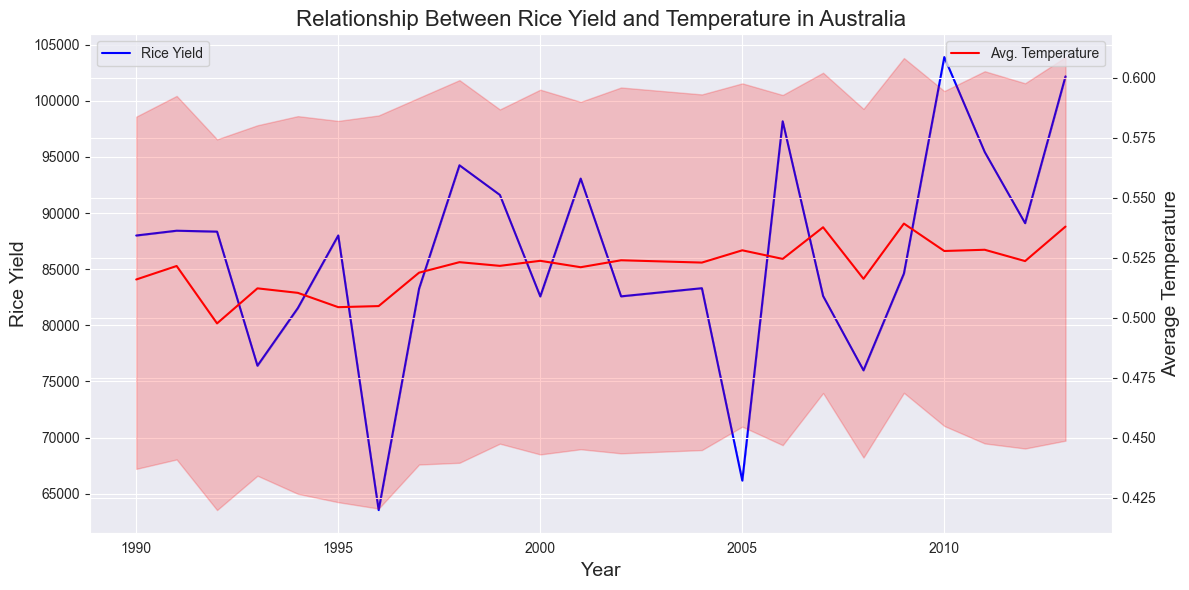

In [27]:
plot_yield_temperature(rice_data, 'Australia')

- Volatile Trends: Unlike Egypt, Australia's rice yield exhibits a more volatile trend over the years. There are significant peaks and troughs throughout the period.
- Temperature Influence: There isn't a consistent pattern between temperature and rice yield as observed in Egypt. For instance, the year 2001 had a high yield but wasn't necessarily warmer than other years. Similarly, the year 2008 had one of the lowest yields but wasn't among the coolest years.
- Notable Peaks & Dips: The years around 2000 and 2010 saw significant spikes in rice yield. In contrast, there were notable dips in 2008 and 2009. The temperature doesn't seem to be the sole determinant for these fluctuations, suggesting other factors might be at play in influencing rice production in Australia.

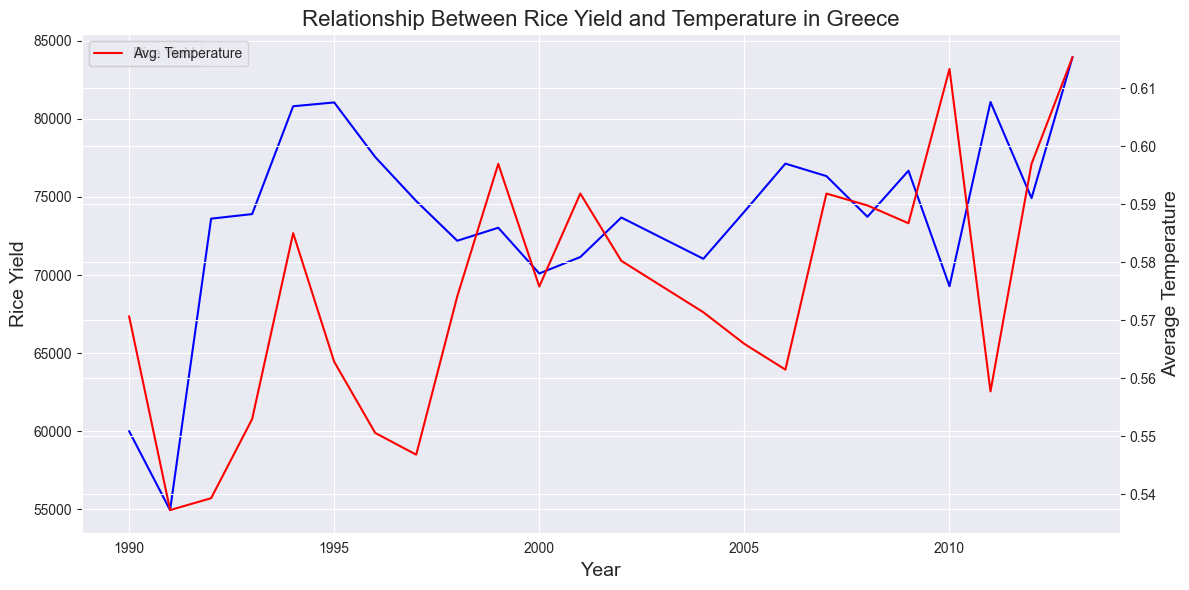

In [28]:
plot_yield_temperature(rice_data, 'Greece')

- Steady Rise & Sudden Drop: Rice yield in Greece shows a steady rise from 1990 to around the early 2000s. This is followed by a period of stability until around 2008, after which there's a sudden drop.
- Temperature Influence: The color gradient (representing average temperature) shows that the years with higher rice yields in the early 2000s were associated with a mix of temperatures, suggesting that temperature alone might not be the main factor influencing rice production during that period.
- Post-2008 Scenario: The drop in rice yield post-2008 doesn't seem to align directly with the temperature gradient. This indicates that other factors, not captured in the dataset, might have played a role in the decline.

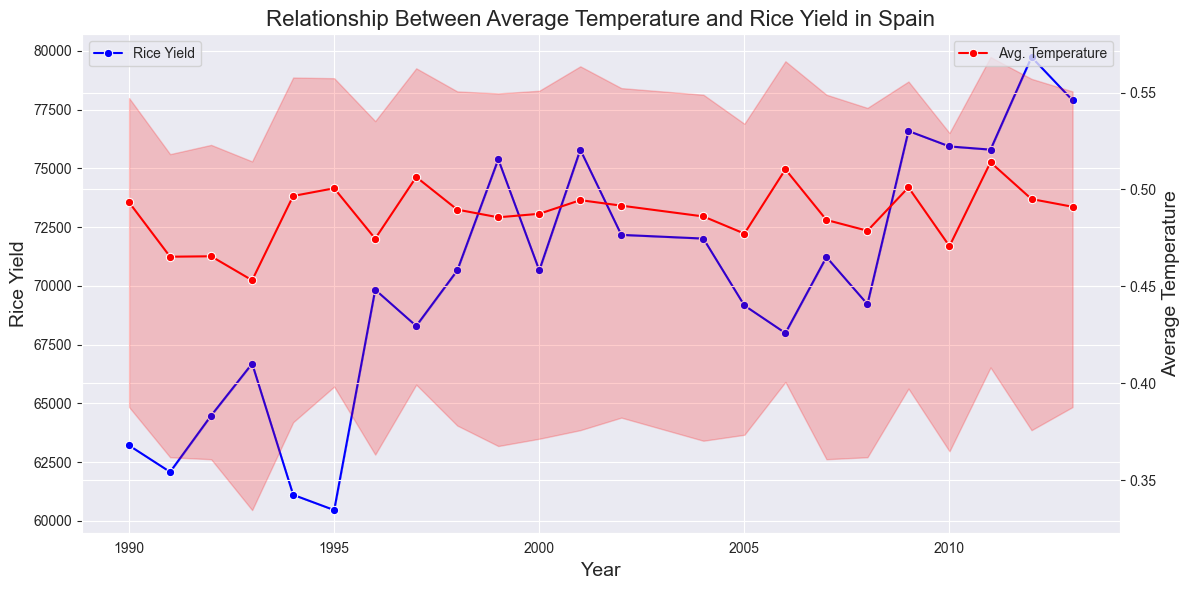

In [18]:
def plot_temp_vs_yield_dual_axis(data, country):
    """Dual-axis plot for the relationship between average temperature and rice yield."""
    
    # Filter data for the specified country
    country_data = data[data['Country'] == country]
    
    # Set the style and size
    sns.set_style("darkgrid")
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot rice yield on the primary y-axis
    sns.lineplot(data=country_data, x='Year', y='Yield', marker="o", ax=ax1, color='b', label='Rice Yield')
    ax1.set_ylabel('Rice Yield', fontsize=14)
    ax1.set_xlabel('Year', fontsize=14)
    ax1.legend(loc='upper left')
    
    # Create a secondary y-axis for temperature
    ax2 = ax1.twinx()
    sns.lineplot(data=country_data, x='Year', y='Average_Temperature', marker="o", ax=ax2, color='r', label='Avg. Temperature')
    ax2.set_ylabel('Average Temperature', fontsize=14)
    ax2.legend(loc='upper right')
    
    # Set title
    plt.title(f'Relationship Between Average Temperature and Rice Yield in {country}', fontsize=16)
    
    plt.tight_layout()
    plt.show()

# Dual-axis plot for Spain
plot_temp_vs_yield_dual_axis(rice_data, 'Spain')



- Stability and Slight Increase: From 1990 until the early 2000s, the rice yield in Spain remains relatively stable with a slight increasing trend.
- Fluctuations Post-2000: Post-2000, there are noticeable fluctuations in the rice yield with distinct peaks around 2003 and 2010 and troughs in 2006 and 2008.
- Temperature Variations: While there are some temperature fluctuations over the years, there isn't a clear and consistent correlation with rice yield. For instance, the year 2008 had a dip in yield, but the temperature was relatively average.
- Post-2010 Decline: There's a noticeable decline in rice yield after 2010. The temperature doesn't show significant variations during this period, hinting at the influence of other external factors on rice production.

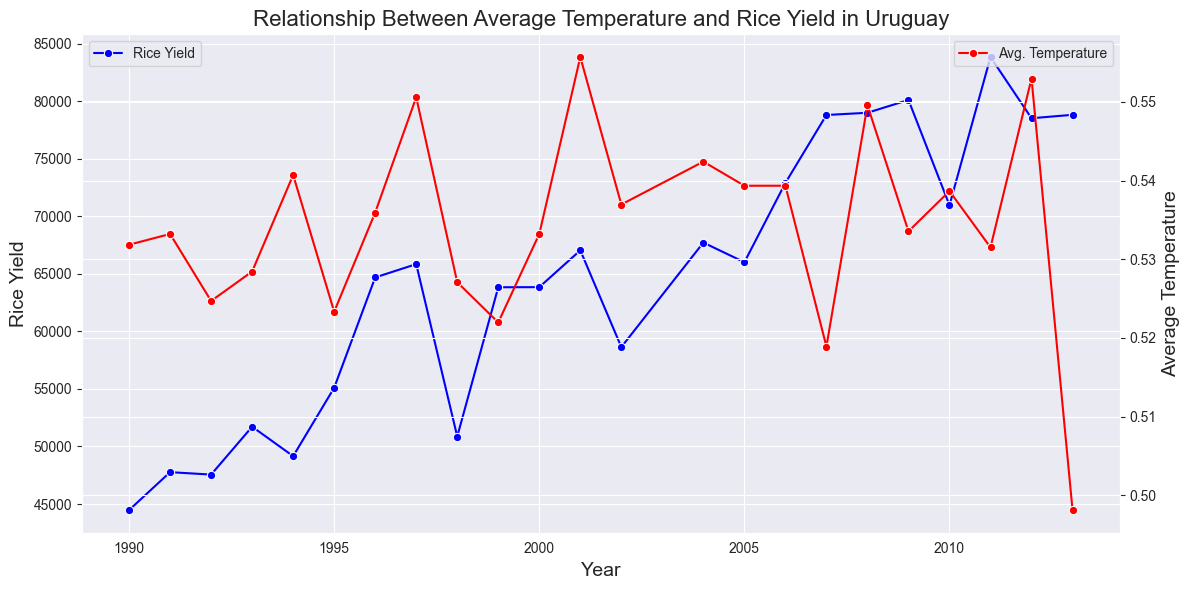

In [19]:
# Dual-axis plot for Uruguay
plot_temp_vs_yield_dual_axis(rice_data, 'Uruguay')

- Initial Stability: From 1990 to around 1997, the rice yield in Uruguay remains relatively stable.
- Significant Increase: Post-1997, there's a sharp increase in rice yield that peaks around 2001. This increase is followed by a period of relative stability up to 2010.
- Temperature Variations: The temperature in Uruguay seems to fluctuate moderately over the years. However, there isn't a direct correlation with rice yield. For instance, the sharp yield increase from 1997 to 2001 doesn't align with any significant temperature rise.
- Yield Fluctuations Post-2010: After 2010, the rice yield in Uruguay shows noticeable fluctuations. These fluctuations don't align directly with temperature changes, indicating other factors might be influencing rice production.